## Holt-Winters Methods

In the previous section on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    
<h3>For Further Reading:</h3>
<tt>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc43.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>What is Exponential Smoothing?</font></tt></div>

In [1]:
# Library imports

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
### Load the data and validate the load

df = pd.read_csv("D://ML-Datasets//Udemy-TimeSeries//airline_passengers.csv", 
                index_col='Month', parse_dates=True)
df.dropna(inplace=True)

df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Setting a DatetimeIndex Frequency

In holt winters method, we need to set a frequency of our date time index (whether it's daily, monthly etc.)
Since observations occur at the start of each month, we'll use MS.

A full list is as below 
<a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'> here </a>

In [3]:
print(df.index)  # Currently frequency is none
df.index.freq = 'MS'  # Setting it to Month Start
print(df.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')


### Simple Exponential Smoothing

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [4]:
span = 12
alpha = 2/(span + 1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(span=span, adjust=False).mean()
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [5]:
# Now we will create the model
fitted_model = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False)
df['SEM12'] = fitted_model.fittedvalues.shift(-1)

print("After applying EWMA and SES")
df.head()

After applying EWMA and SES


,Thousands of Passengers,EWMA12,SEM12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


For some reason, when optimized=False is passed into .fit(), the statsmodels SimpleExpSmoothing function shifts 
fitted values down one row. We fix this by adding .shift(-1) after fittedvalues

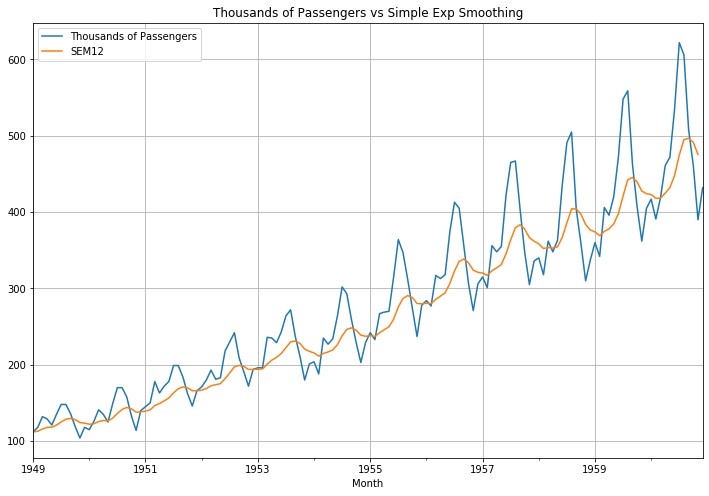

In [8]:
# We will plot the values
df[['Thousands of Passengers', 'SEM12']].plot(figsize=(12, 8), 
                                              title='Thousands of Passengers vs Simple Exp Smoothing', grid=True)

### Double Exponential Smoothing

Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [10]:
fitted_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit()
df['DES_add_12'] = fitted_model.fittedvalues.shift(-1)
df.head()

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SEM12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237772
1949-02-01,118,112.923077,112.923077,120.237772
1949-03-01,132,115.857988,115.857988,134.237772
1949-04-01,129,117.879836,117.879836,131.237772
1949-05-01,121,118.359861,118.359861,123.237772


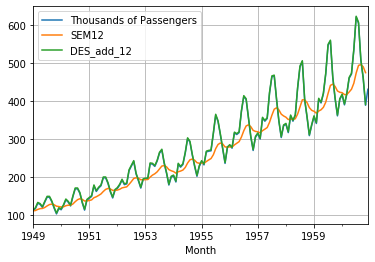

In [19]:
# Now we will plot the values
df[['Thousands of Passengers', 'SEM12', 'DES_add_12']].plot(grid=True)

**We see the Double Exponential have started fitting the lines overall. In order to better visualise
We will plot the first 24 months only**

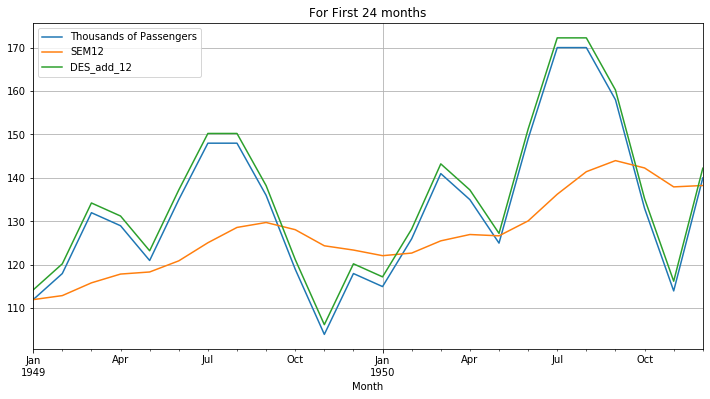

In [20]:
df[['Thousands of Passengers', 'SEM12', 'DES_add_12']].iloc[:24].plot(figsize=(12, 6),
                                                title='For First 24 months', grid=True).autoscale(axis='x', tight=True)

We see that Double Exponential Smoothening is a much better representation of the data

**Now we will see, if multiplicative adjustment gives even better representation**

In [13]:
fitted_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit()
df['DES_mul_12'] = fitted_model.fittedvalues.shift(-1)
df.head()

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SEM12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247
1949-02-01,118,112.923077,112.923077,120.237772,118.051885
1949-03-01,132,115.857988,115.857988,134.237772,132.058041
1949-04-01,129,117.879836,117.879836,131.237772,129.056722
1949-05-01,121,118.359861,118.359861,123.237772,121.053204


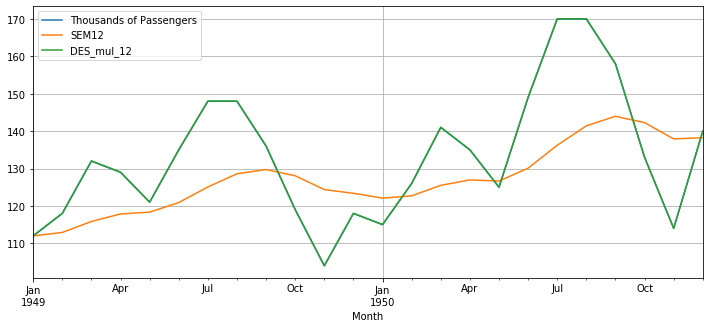

In [21]:
# Validate through a plot and subset it for 24 months

df[['Thousands of Passengers', 'SEM12', 'DES_mul_12']].iloc[:24].plot(figsize=(12, 5), grid=True).autoscale(axis='x', 
                                                                                                 tight=True)

The plot shows, the multiplicative adjustment gives even better fit to the overall data

### Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [15]:
fitted_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add', 
                                    seasonal_periods=12).fit()
df['TES_add_12'] = fitted_model.fittedvalues
df.head()

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Thousands of Passengers,EWMA12,SEM12,DES_add_12,DES_mul_12,TES_add_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247,113.081288
1949-02-01,118,112.923077,112.923077,120.237772,118.051885,120.550753
1949-03-01,132,115.857988,115.857988,134.237772,132.058041,135.527339
1949-04-01,129,117.879836,117.879836,131.237772,129.056722,133.155076
1949-05-01,121,118.359861,118.359861,123.237772,121.053204,125.656129


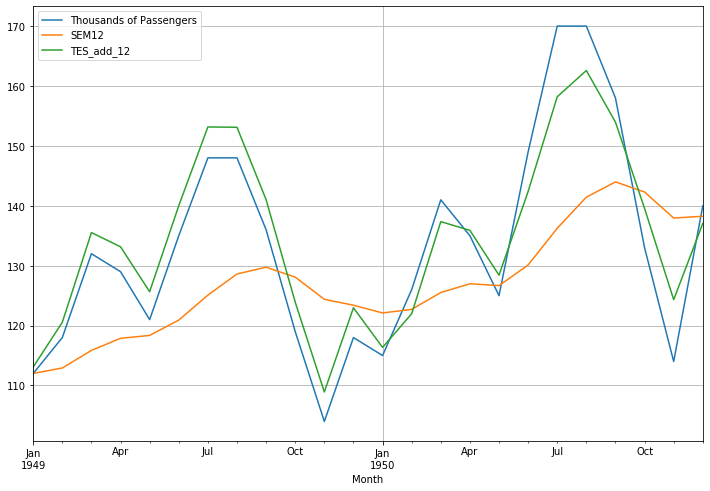

In [22]:
# Validate with a plot and subset for initial 24 months
df[['Thousands of Passengers', 'SEM12', 'TES_add_12']].iloc[:24].plot(figsize=(12, 8), grid=True).autoscale(axis='x',
                                                                                                tight=True)


In [17]:
# we have see that multiplicative model has given a better fit earlier, we would use the same
fitted_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul',
                                    seasonal_periods=12).fit()
df['TES_mul_12'] = fitted_model.fittedvalues
df.head()

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SEM12,DES_add_12,DES_mul_12,TES_add_12,TES_mul_12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247,113.081288,111.608110
1949-02-01,118,112.923077,112.923077,120.237772,118.051885,120.550753,118.853687
1949-03-01,132,115.857988,115.857988,134.237772,132.058041,135.527339,133.343675
1949-04-01,129,117.879836,117.879836,131.237772,129.056722,133.155076,127.912641
1949-05-01,121,118.359861,118.359861,123.237772,121.053204,125.656129,120.991626


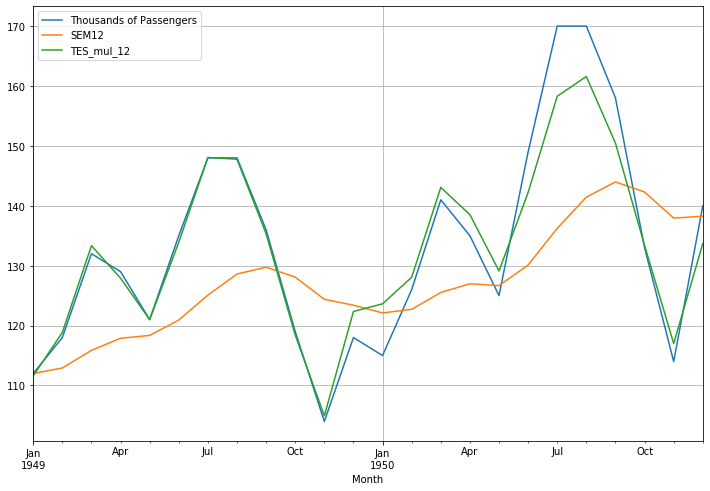

In [23]:
# Validate with plot
df[['Thousands of Passengers', 'SEM12', 'TES_mul_12']].iloc[:24].plot(figsize=(12, 8), grid=True).autoscale(axis='x', 
                                                                                                tight=True)

We see the double exponential smoothing is much better fit than triple exponential smoothing.

Based on the plot above, you might think that Triple Exponential Smoothing does a poorer job of fitting than
Double Exponential Smoothing. The key here is to consider what comes next - forecasting. We'll see that having the
ability to predict fluctuating seasonal patterns greatly improves our forecast.